### Sentiment analysis by scene

In [1]:
from __future__ import division

In [2]:
import os
import re
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [3]:
afinn96 = pd.read_table('AFINN/AFINN-96.txt', names=['word','score'])
afinn111 = pd.read_table('AFINN/AFINN-111.txt', names=['word','score'])

In [4]:
afinn = afinn111.merge(afinn96[~afinn96.word.isin(afinn111.word.values)], how='outer')

In [5]:
def score_text(tokens):
    score = 0
    for w in tokens:
        if w in afinn['word'].values:
            score += int(afinn[afinn.word == w]['score'])
    return score

def avg_word_valence(tokens):
    n_afinn = len([w for w in tokens if w in afinn.word.values])
    return score_text(tokens)/n_afinn

In [6]:
files = [f for f in os.listdir('plays') if f.endswith('.txt')]

In [7]:
f = open('plays/midsummersnightsdream.txt', 'r')
raw = f.read()
text = ' '.join([re.sub('\t', ' ', l) for l in raw.splitlines() if l != ''])

In [8]:
tokenizer = RegexpTokenizer(r'\w+')

In [23]:
plays = {}
for filename in files:
    title = filename[:-4]
    with open('plays/{}'.format(filename), 'r') as f:
        raw = f.read()
        text = ' '.join([re.sub('\t', ' ', l) for l in raw.splitlines() if l != ''])
        plays[title] = {'scenes': {}, 'sentiment': {}, 'avg_word_valence': {}}
        i = 1
        for scene in re.split('SCENE [IVXCLM]+ ', text)[1:]:
            n = i
            tokens = tokenizer.tokenize(scene)
            names = [w.lower() for w in set(tokens) if w.isupper()]
            tokens = [w.lower() for w in tokens if w.lower() not in names]
            plays[title]['scenes'][n] = [w for w in tokens if w not in nltk.corpus.stopwords.words('english')]
            plays[title]['sentiment'][n] = score_text(plays[title]['scenes'][n])
            plays[title]['avg_word_valence'][n] = avg_word_valence(plays[title]['scenes'][n])
            i += 1
        

In [10]:
scenes = {}
scenes_sentiment = {}
scenes_awv = {}
i = 1
for scene in re.split('SCENE [IVXCLM]+ ', text)[1:]:
    key = i
    tokens = tokenizer.tokenize(scene)
    names = [w.lower() for w in set(tokens) if w.isupper()]
    tokens = [w.lower() for w in tokens if w.lower() not in names]
    scenes[key] = [w for w in tokens if w not in nltk.corpus.stopwords.words('english')]
    scenes_sentiment[key] = score_text(scenes[key])
    scenes_awv[key] = avg_word_valence(scenes[key])
    i += 1

In [11]:
tmp = pd.DataFrame.from_dict(scenes_sentiment, orient='index').reset_index()

In [12]:
tmp.columns = ['scene', 'score']

In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

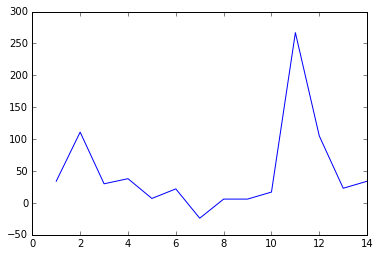

In [15]:
plt.plot(tmp.scene, tmp.score)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

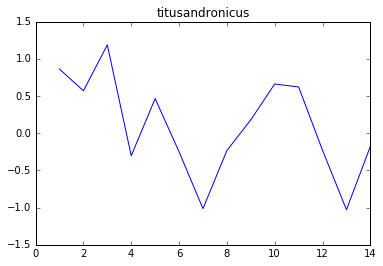

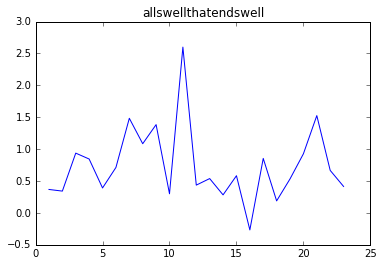

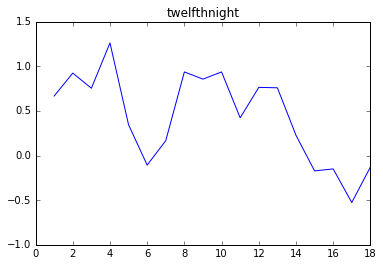

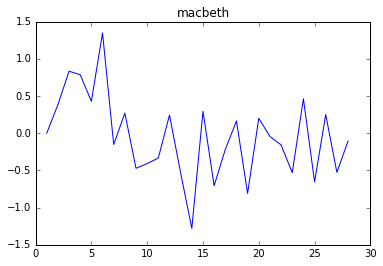

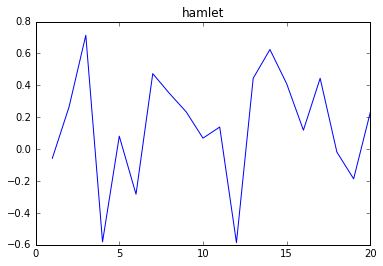

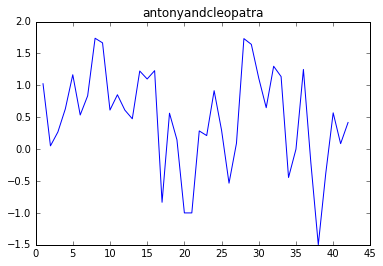

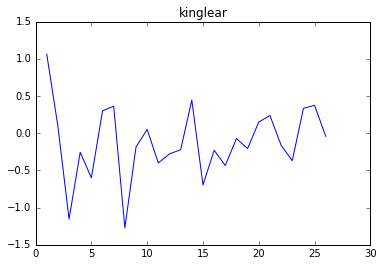

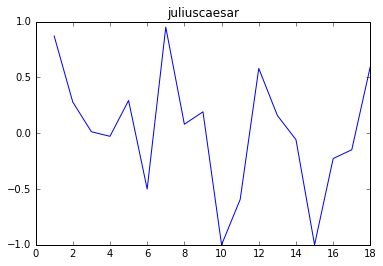

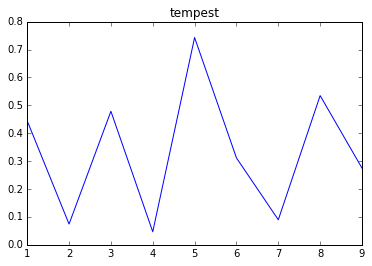

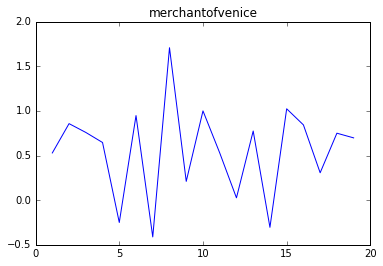

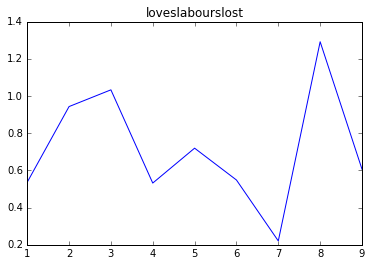

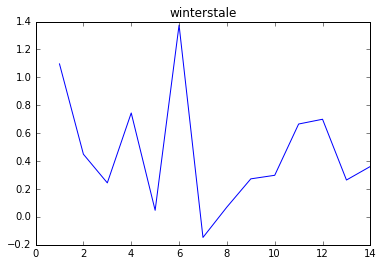

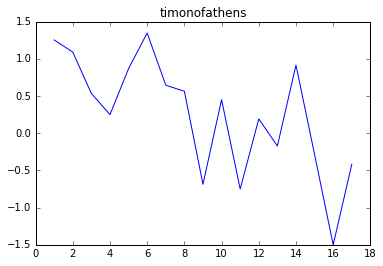

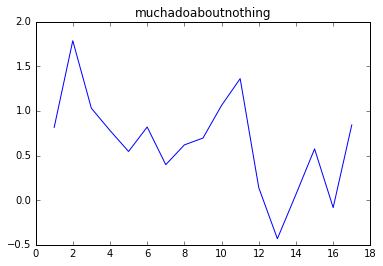

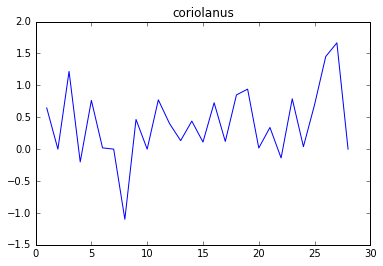

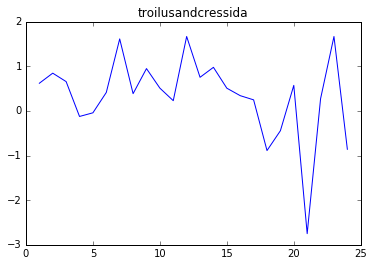

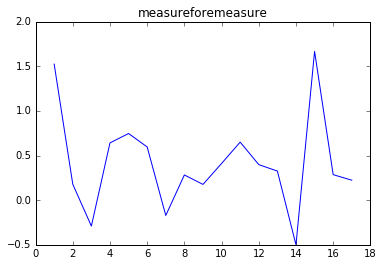

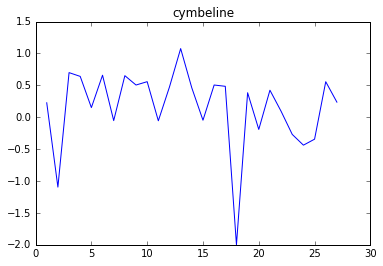

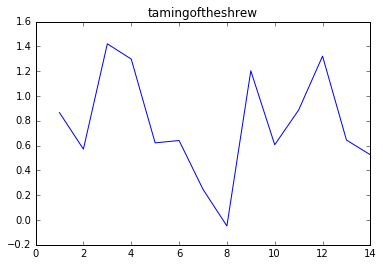

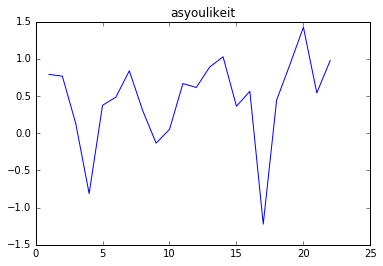

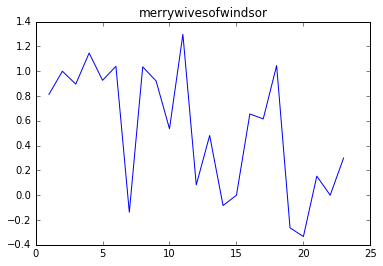

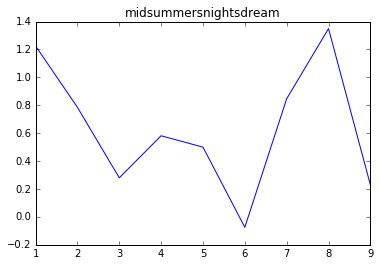

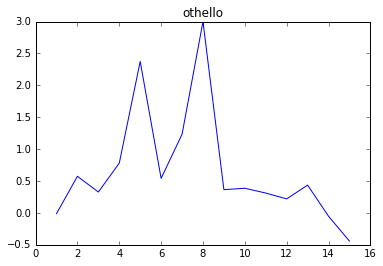

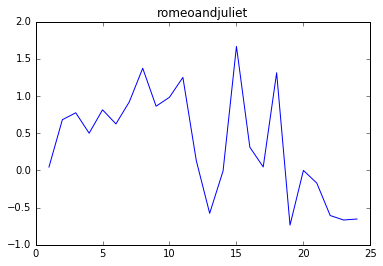

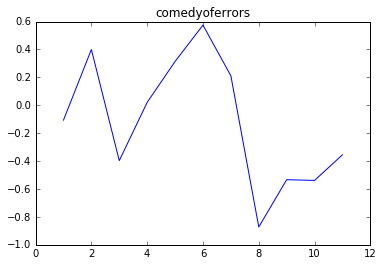

In [31]:
for title in plays.keys():
    tmp = pd.DataFrame.from_dict(plays[title]['avg_word_valence'], orient='index').reset_index()
    tmp.columns = ['scene', 'score']
    plt.figure()
    plt.plot(tmp.scene, tmp.score)
    plt.title(title)